
**Welcome to a very brief tutorial on querying spatial data**

There are a lot of ways to process, analyze, and visualize spatial data. In this brief demo, I've set up a jupyter notebook let you explore spatial and aspatial queries on a given data set.

In [126]:
import geopandas
%matplotlib inline

The above lines import geopandas into our notebook and tell the plotting library (what draws our maps) to show results in the notebook itself.

For the purposes of this exploration, you don't *really* have to worry about how these things work too much. Think of *GeoPandas* as a light-weight, Python-based GIS and a Jupyter notebook as a means of interacting with Python through a web browser.

*If you'd like to know more, you might find these websites useful*:

http://geopandas.org

http://jupyter.org

**But the point here is to explore the results of querying a specific data set in a spatial and aspatial manner**


In the next cell, we are going to load up a polygone-based dataset of countries in the world. It is included with GeoPandas and comes from the free dataset found at http://www.naturalearthdata.com
 
We load it with GeoPandas by creating a GeoDataFrame. This is essentially a big spatial database table that has some similarities to what you find in ArcGIS' tables; however, it's a bit easier to manipulate using python.

In truth, behind the scenes, GeoPandas is using another spatial data library for python called Fiona which is itself using the open-source GDAL/OGR libraries. You can read more about that here: http://geopandas.org/io.html

**Again, the _key_ thing to remember here is that while the syntax (and tools) are different than ArcGIS, the _concepts_ are the same.** 

We're going to load and query some data. We'll then use the .head(5) method to then display the first five entries of the database.


In [127]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head(5)

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


Similarly, we can load a point-based dataset of cities that's also included with GeoPandas.

In [128]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities.head(5)

,geometry,name
0,POINT (12.45338654497177 41.90328217996012),Vatican City
1,POINT (12.44177015780014 43.936095834768),San Marino
2,POINT (9.516669472907267 47.13372377429357),Vaduz
3,POINT (6.130002806227083 49.61166037912108),Luxembourg
4,POINT (158.1499743237623 6.916643696007725),Palikir


We can make (a rather ugly) map of the two layers using the .plot() method.

*There is going to be some complicated syntax below. I am setting the Coordinate Reference systems and the colors to be used*

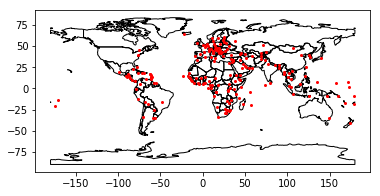

In [129]:
cities = cities.to_crs(world.crs)
base = world.plot(color='white')

cities.plot(ax=base, color='red')

We now have country-level polygon data that includes a GDP estimate and a population estimate as well as point-data for major cities around the world.

Let's start querying this data!

First, let's create a new column that's an estimate of GDP per capita. Doing so is fairly easy, we use the following code:

In [130]:
world['gdp_per_cap']= world.gdp_md_est / world.pop_est *1000000

(world[['name', 'gdp_per_cap']]).head(10)

,name,gdp_per_cap
0,Afghanistan,784.154930
1,Angola,8617.663491
2,Albania,5992.658787
3,United Arab Emirates,38407.907819
4,Argentina,14027.126052
5,Armenia,6326.246948
6,Antarctica,200000.000000
7,Fr. S. Antarctic Lands,114285.714286
8,Australia,37634.083179
9,Austria,40132.609347


Imagine we only wanted countries with a per capita GDP of greater than $30,000.

We could do so with a "select by attribute" call:

In [131]:
print world[['name', 'gdp_per_cap']][(world['gdp_per_cap'] > 30000)]



                       name     gdp_per_cap
3      United Arab Emirates    38407.907819
6                Antarctica   200000.000000
7    Fr. S. Antarctic Lands   114285.714286
8                 Australia    37634.083179
9                   Austria    40132.609347
12                  Belgium    37381.163811
23                   Brunei    52165.176846
27                   Canada    38820.793898
28              Switzerland    41646.574310
39                   Cyprus    42698.066361
41                  Germany    35442.834655
43                  Denmark    37014.749541
49                    Spain    34620.602856
52                  Finland    36855.212346
54             Falkland Is.    33471.337580
55                   France    33220.002338
57           United Kingdom    31764.222158
64                   Greece    31944.335273
74                  Ireland    44822.992006
77                  Iceland    41441.958434
79                    Italy    31362.786896
82                    Japan    3

Hey, what's Antartica doing there? We can do a 'select by attribute' query **again**, but this time we'll create a new GeoDataFrame (worldA) that does not include Antarctica:


In [132]:
worldA = world[(world.name!='Antarctica')]

print worldA[['name', 'gdp_per_cap']][(worldA['gdp_per_cap'] > 30000)]


                       name     gdp_per_cap
3      United Arab Emirates    38407.907819
7    Fr. S. Antarctic Lands   114285.714286
8                 Australia    37634.083179
9                   Austria    40132.609347
12                  Belgium    37381.163811
23                   Brunei    52165.176846
27                   Canada    38820.793898
28              Switzerland    41646.574310
39                   Cyprus    42698.066361
41                  Germany    35442.834655
43                  Denmark    37014.749541
49                    Spain    34620.602856
52                  Finland    36855.212346
54             Falkland Is.    33471.337580
55                   France    33220.002338
57           United Kingdom    31764.222158
64                   Greece    31944.335273
74                  Ireland    44822.992006
77                  Iceland    41441.958434
79                    Italy    31362.786896
82                    Japan    34065.509919
89                   Kuwait    5

**Great**. It's pretty powerful to be able to run aspatial queries with a single line of code.

But, what about spatial queries. Now let's try to select only those **cities** that are **within** countries with a greater per capita GDP than $30,000. 


In [133]:
cities_gdp = geopandas.sjoin(cities, worldA, how="inner", op="within")

print cities_gdp[['name_left', 'continent', 'gdp_per_cap']][cities_gdp['gdp_per_cap']>30000]

               name_left      continent    gdp_per_cap
38             Abu Dhabi           Asia   38407.907819
118             Canberra        Oceania   37634.083179
2                  Vaduz         Europe   40132.609347
184               Vienna         Europe   40132.609347
158             Brussels         Europe   37381.163811
103  Bandar Seri Begawan           Asia   52165.176846
101               Ottawa  North America   38820.793898
20                  Bern         Europe   41646.574310
175               Berlin         Europe   35442.834655
155            København         Europe   37014.749541
166               Madrid         Europe   34620.602856
154             Helsinki         Europe   36855.212346
11               Andorra         Europe   33220.002338
8                 Monaco         Europe   33220.002338
199                Paris         Europe   33220.002338
187               London         Europe   31764.222158
178               Athens         Europe   31944.335273
145       

**Again, that's _a lot_ of syntax. However, at its heart, you can see what we're doing.**

First we use a _spatial join_ (sjoin) to add the data from the worldA GeoDataFrame to the cities_gdp GeoDataFrame.
We do so by adding the information from worldA to cities_gdp based on which country the city is **within**.

Then we print out every city that is within a country with a gdp greater than $30,000.

We can also plot this information, just like we did above, like so:

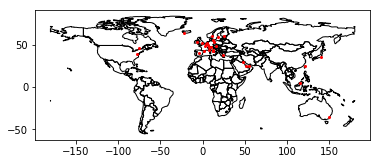

In [134]:
cities_gdp = cities_gdp.to_crs(worldA.crs)
base = worldA.plot(color='white')

cities_gdp[cities_gdp['gdp_per_cap']>30000].plot(ax=base, color='red')

Now let's have some _fun_.

We have a country level, polygon dataset that includes population estimates, gdp estimates, and a (created) gdp per capita estimate.
We have a point dataset of some set of cities in the world. We have used a spatial join to add the country level information for the country the city is in.

What queries might we ask to produce what sorts of maps? What cities do you want to see?
_By default, this cell will be identical to the one above. Let's change it to ask different questions.

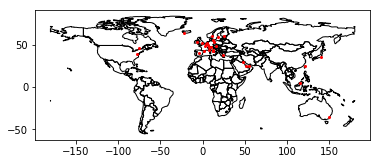

In [135]:
cities_gdp = cities_gdp.to_crs(worldA.crs)
base = worldA.plot(color='white')

cities_gdp[cities_gdp['gdp_per_cap']>30000].plot(ax=base, color='red')

Finally, there are two other things I want to show you. These aren't related to spatial and aspatial queries, but they're fun and powerful. I include them so that you can explore these abilities if they interest you.

First, let's make a choropleth map baded on GDP per capita.

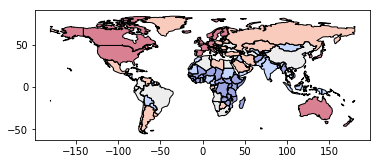

In [136]:
worldA.plot(column='gdp_per_cap', cmap='coolwarm', scheme='percentiles')

A few notes on the above:

First, column is the column visualized in the choropleth map.
Second, cmap is the color ramp being used. You can find a list of those included here: http://matplotlib.org/users/colormaps.html
Third, scheme is the classification scheme. I've chosen percentiles. You can also use other options like quantiles, natural breaks, etc. You can find out more here: http://pysal.readthedocs.io/en/latest/library/esda/mapclassify.html

Here's one final bit of code for you to play with:

In [137]:
import folium

map1 = folium.Map(tiles='cartodbpositron')

citypoints = folium.features.GeoJson(cities_gdp[cities_gdp['gdp_per_cap']>30000].to_crs(epsg=4326).to_json())

map1.add_children(citypoints)
map1

Here, I'm using folium (another python library that creates interactive web maps using Leaflet) to create a web map that contains markers on every city selected by our querying above.

You can read more about how to work with folium here: http://folium.readthedocs.io/en/latest/quickstart.html

But, the point in including it here is to show you how powerful some simple queries are and how while _syntax may differ_ the ability to query, manipulate, and then analyze spatial data can shape what is and isn't seen in a number of contexts.

GeoPandas can also handle shapefiles.

In the next cell, we are going to load the shapefile 'gct_000b11a_e.shp' This is the same shapefile that you will be using in your upcoming lab and contains the census tract polygons.


In [138]:
Canada_CT = geopandas.read_file('gct_000b11a_e/gct_000b11a_e.shp')
Canada_CT.head(5)

,CMANAME,CMAPUID,CMATYPE,CMAUID,CTNAME,CTUID,PRNAME,PRUID,geometry
0,London,35555,B,555,0021.00,5550021.00,Ontario,35,POLYGON ((-81.26066936399991 42.99323308700008...
1,Kitchener - Cambridge - Waterloo,35541,B,541,0010.00,5410010.00,Ontario,35,POLYGON ((-80.49102590999991 43.44799829000004...
2,Toronto,35535,B,535,0091.02,5350091.02,Ontario,35,POLYGON ((-79.39659040299995 43.67472160500006...
3,Greater Sudbury / Grand Sudbury,35580,B,580,0161.01,5800161.01,Ontario,35,POLYGON ((-81.19773962599993 46.55366092600008...
4,Halifax,12205,B,205,0120.00,2050120.00,Nova Scotia / Nouvelle-Écosse,12,POLYGON ((-63.55445451699995 44.55067821800009...



The shapefile contains **every** census tract in Canada. We want to focus in on Vancouver for this demonstration, so we're going to use a **select by attribute** query to select **only** those census tracts in the Vancouver Census Metropolitan Area.

We do this by saying we want **only** those parts of the table where the CMANAME colum (Census Metroplitan Area Name) has the value of "Vancouver."

In GeoPandas, we do this with the syntax: *Canada_CT['CMANAME'] == 'Vancouver'*

Is this a **spatial** or **aspatial** query? How would you carry out this operation in ArcGIS?

In [139]:
Vancouver_CT = Canada_CT[(Canada_CT['CMANAME'] == 'Vancouver')]
Vancouver_CT.head(5)

,CMANAME,CMAPUID,CMATYPE,CMAUID,CTNAME,CTUID,PRNAME,PRUID,geometry
25,Vancouver,59933,B,933,0147.01,9330147.01,British Columbia / Colombie-Britannique,59,POLYGON ((-123.1139905559999 49.17009646400004...
27,Vancouver,59933,B,933,0187.14,9330187.14,British Columbia / Colombie-Britannique,59,POLYGON ((-122.7677623349999 49.15303255100008...
31,Vancouver,59933,B,933,0203.00,9330203.00,British Columbia / Colombie-Britannique,59,POLYGON ((-122.9306044869999 49.20760959900008...
40,Vancouver,59933,B,933,0134.00,9330134.00,British Columbia / Colombie-Britannique,59,POLYGON ((-123.1398090019999 49.33816241500006...
49,Vancouver,59933,B,933,0403.05,9330403.05,British Columbia / Colombie-Britannique,59,POLYGON ((-122.6394168969999 49.22053149500005...


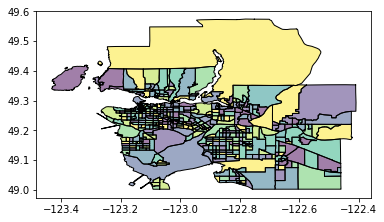

In [140]:
Vancouver_CT.plot()